In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Polygon
import random
import copy
#%matplotlib inline

## Question 1: Unexpected Plots 

[[ 0.   6. ]
 [-5.2  3. ]
 [-5.2 -3. ]
 [-0.  -6. ]
 [ 5.2 -3. ]
 [ 5.2  3. ]
 [ 0.   6. ]]


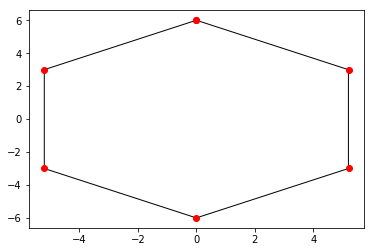

In [13]:
# Create the Hexagon with matplotlib.patches.RegularPolygon
hex = RegularPolygon((0,0), numVertices=6, radius=6 , fill=False)
plt.plot()
plt.gca().add_patch(hex)

#obtain the vertices points
verts = hex.get_path().vertices
trans = hex.get_patch_transform()
points = trans.transform(verts)
points = np.around(points, 2) #points in 2 decimals
print (points)
plt.plot(points[:,0], points[:,1], 'ro')
plt.show()
#from the output one vertice seem to be repeated 


In [9]:
# picking a random point
x = random.randint(-5,5) # spacified based on the vertices to ensure they fall within the hexagon
y = random.randint(-3,3)
p= (x,y) # the picked random point p
p

(1, 1)

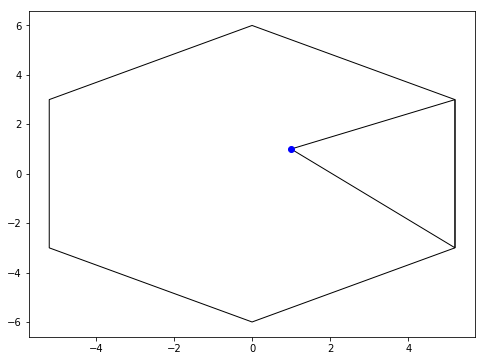

In [14]:
# a list of adjacent vertices
vertices = []
for i,point in enumerate(points):
  if i < len(points) - 1: #not to repeat the last point
    vert_points = ()
    vertices.append((point,points[i+1]))
#print (vertices)

# a fanction to randomly picking the adjacent vertices and connecting to random point p
def triangle(random_point = np.array(p)):
  random_num = random.randint(0, 5)
  random_vertices = list(vertices[random_num])
  random_vertices.append(random_point)
  random_vertices =  np.array(random_vertices)
  #print (random_vertices) # 3 by 2 array
  return random_vertices

#triange T with matplotlib.patches.Polygon
tri_vertices = triangle()
T = Polygon(tri_vertices,fill= False) #triangle T

#visualize the plot
#import copy
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hex = copy.copy(hex)

hex.axes = None
hex.figure = None
hex.set_transform(ax.transData)

plt.gca().add_patch(hex)
plt.plot()
plt.gca().add_patch(T)
plt.plot(x, y, 'bo') # plotting the random point p
plt.show()


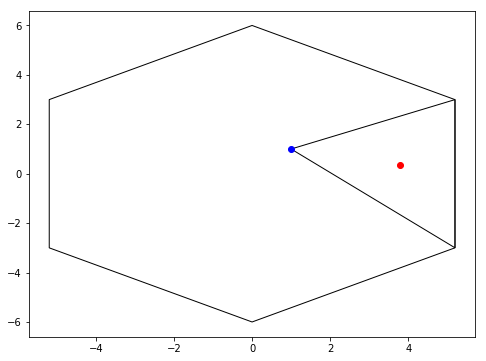

In [16]:
#  a function to compute the centroid of T
def centroid(triangle):
  centroid = [sum(x)/3 for x in zip(*triangle)] # centroid is given by the point ((x1,x2,x3)/3), ((y1,y2,y3)/3)
  return  centroid
centr =  np.array(centroid(tri_vertices))
#print(centr)

#visualizing the point
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)

hex = copy.copy(hex)
tri = copy.copy(T)

hex.axes = None
T.axes = None

hex.figure = None
T.figure = None

hex.set_transform(ax.transData)
T.set_transform(ax.transData)

plt.gca().add_patch(hex)
plt.plot()
plt.gca().add_patch(T)
plt.plot(x, y, 'bo') # the random point
plt.plot(centr[0], centr[1], 'ro') # the centroid
plt.show()

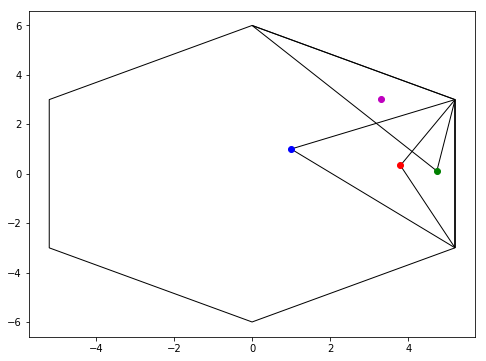

In [17]:
vert =  triangle(random_point = centr) # computing new triangle vertices with a new random point, centr

new_centr =  np.array(centroid(vert)) # computing a new centriod from the new triangle vertices

vert2 =  triangle(random_point = new_centr)

new_centr_1 =  np.array(centroid(vert2))

# visualizing the new random points triangles
T_2  = Polygon(vert,fill= False, closed =True)
T_3  = Polygon(vert2,fill= False, closed =True)

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)

hex = copy.copy(hex)
tri = copy.copy(T)

hex.axes = None
T.axes = None

hex.figure = None
T.figure = None

hex.set_transform(ax.transData)
T.set_transform(ax.transData)

plt.gca().add_patch(hex)
plt.gca().add_patch(T_2)
plt.gca().add_patch(T_3)


plt.gca().add_patch(T)
plt.plot(x, y, 'bo')
plt.plot(centr[0], centr[1], 'ro')
plt.plot(new_centr[0], new_centr[1], 'go')
plt.plot(new_centr_1[0], new_centr_1[1], 'mo')
plt.show()

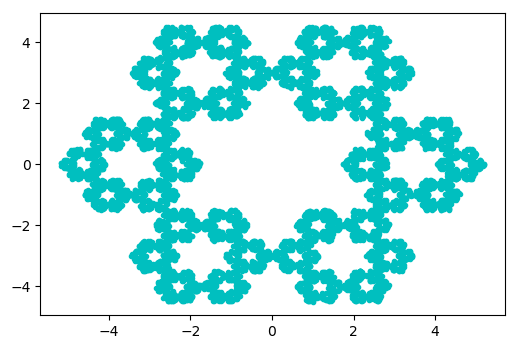

In [18]:
# plotting 10,000 random points
#p = np.array(p)
random_point = centr
random_points = []

for num in range(10000):
  new_vert = triangle(random_point = random_point)
  new_centr =  np.array(centroid(new_vert))
  random_points.append(new_centr)
  random_point = new_centr

random_points = np.array(random_points)
fig = plt.figure(figsize=(6,4), dpi=100)
plt.plot(random_points[:,0],random_points[:,1], 'c.')
plt.show()

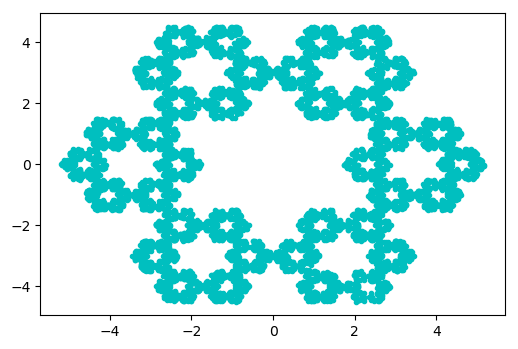

()

In [3]:
# A function for the unexpected Plots
# combine all the previous steps together
def scatter_plot ():
    # Create the Hexagon with matplotlib.patches.RegularPolygon
    hex = RegularPolygon((0,0), numVertices=6, radius=6 , fill=False)

    #obtain the vertices points
    verts = hex.get_path().vertices
    trans = hex.get_patch_transform()
    points = trans.transform(verts)
    points = np.around(points, 2) #points in 2 decimals
    #print (points)
    
    # picking a random point
    x = random.randint(-5,5) # spacified based on the vertices to ensure they fall within the hexagon
    y = random.randint(-3,3)
    p= (x,y) # the picked random point p

    # a list of adjacent vertices
    vertices = []
    for i,point in enumerate(points):
      if i < len(points) - 1: #not to repeat the last point
        vert_points = ()
        vertices.append((point,points[i+1]))
    #print (vertices)

    # a fanction to randomly picking the adjacent vertices and connecting to random point p
    def triangle(random_point = np.array(p)):
      random_num = random.randint(0, 5)
      random_vertices = list(vertices[random_num])
      random_vertices.append(random_point)
      random_vertices =  np.array(random_vertices)
      #print (random_vertices) # 3 by 2 array
      return random_vertices
    
    #  a function to compute the centroid of T
    def centroid(triangle):
      centroid = [sum(x)/3 for x in zip(*triangle)] # centroid is given by the point ((x1,x2,x3)/3), ((y1,y2,y3)/3)
      return  centroid
    
    # plotting 10,000 random points
    p = np.array(p)
    random_point = p
    random_points = []

    for num in range(10000):
      new_vert = triangle(random_point = random_point)
      new_centr =  np.array(centroid(new_vert))
      random_points.append(new_centr)
      random_point = new_centr

    random_points = np.array(random_points)
    fig = plt.figure(figsize=(6,4), dpi=100)
    plt.plot(random_points[:,0],random_points[:,1], 'c.')
    plt.show()
    
    return ()

scatter_plot() 

## Question 2: Datascience with Pandas and Movie Data

In [6]:
# Read files into separate dataframes
df0 = pd.read_csv('title.akas.tsv.gz', compression='gzip', header=0, sep='\t', low_memory=False)
df1 = pd.read_csv('title.basics.tsv.gz', compression='gzip', header=0, sep='\t', low_memory=False)
df2 = pd.read_csv('title.ratings.tsv.gz', compression='gzip', header=0, sep='\t', low_memory=False)

print (df0.head(5))

print (df1.head(5))

print (df2.head(5))

print(df0.shape)
print(df1.shape)
print(df2.shape)

     titleId  ordering                      title region language  \
0  tt0000001         1  Carmencita - spanyol tánc     HU       \N   
1  tt0000001         2                 Карменсита     RU       \N   
2  tt0000001         3                 Carmencita     US       \N   
3  tt0000001         4                 Carmencita     \N       \N   
4  tt0000002         1     Le clown et ses chiens     \N       \N   

         types attributes isOriginalTitle  
0  imdbDisplay         \N               0  
1           \N         \N               0  
2           \N         \N               0  
3     original         \N               1  
4     original         \N               1  
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short   

In [31]:
#Drop duplicates
df0.drop_duplicates(inplace = True)
df1.drop_duplicates(inplace = True)
df2.drop_duplicates(inplace = True)

print(df0.shape)
print(df1.shape)
print(df2.shape)

# the output inplies no duplicates found

(3423660, 8)
(5330276, 9)
(874203, 3)


In [9]:
# merge data in to a new dataframe

#inner merge
df_m1 = pd.merge(df1, df2, on = 'tconst', how='inner')
df_inner = pd.merge(df_m1, df0, left_on = 'tconst', right_on = 'titleId', how='inner')
print(df_inner.describe())
print(df_inner.shape)

#outer merge
df_m2 = pd.merge(df1, df2, on = 'tconst', how='outer', indicator=True)
df_outer = pd.merge(df_m2, df0, left_on = 'tconst', right_on = 'titleId', how='outer')
print(df_outer.describe())
print(df_outer.shape)


            isAdult  averageRating      numVotes      ordering
count  1.686547e+06   1.686547e+06  1.686547e+06  1.686547e+06
mean   1.639800e-02   6.539073e+00  1.147923e+04  5.292217e+00
std    1.270005e-01   1.278551e+00  6.097374e+04  6.426494e+00
min    0.000000e+00   1.000000e+00  5.000000e+00  1.000000e+00
25%    0.000000e+00   5.800000e+00  2.100000e+01  1.000000e+00
50%    0.000000e+00   6.700000e+00  1.370000e+02  3.000000e+00
75%    0.000000e+00   7.400000e+00  1.281000e+03  7.000000e+00
max    1.000000e+00   1.000000e+01  2.003628e+06  9.900000e+01
(1686547, 19)
            isAdult  averageRating      numVotes      ordering
count  6.736361e+06   1.975956e+06  1.975956e+06  3.423660e+06
mean   3.090214e-02   6.643070e+00  9.866474e+03  3.290978e+00
std    1.109076e+00   1.310829e+00  5.663827e+04  5.002905e+00
min    0.000000e+00   1.000000e+00  5.000000e+00  1.000000e+00
25%    0.000000e+00   5.900000e+00  1.500000e+01  1.000000e+00
50%    0.000000e+00   6.800000e+00  8.400

### The dataframe with inner merge returns 1,686,547 while that from an outer merge returns 6,740,089.

### The reason is that, *inner merge* returns only the rows that are *shared* by both dataframes and *outer merge* returns *all the rows* from all merged dataframe

In [47]:
#unique method to identify unique titleTypes
print (' The unique titleTypes from the outer merge are')
print(df_outer['titleType'].unique())
print ('The unique titleTypes from the inner merge are')
print(df_inner['titleType'].unique())

 The unique titleTypes from the outer merge are
['short' 'movie' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' nan]
The unique titleTypes from the inner merge are
['short' 'movie' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']


In [10]:
#making a new dataframe with language 'en', region 'us' and movies
#outer merge
df_new = df_outer[(df_outer['titleType'].isin(['movie', 'tvMovie'])) & ((df_outer['region'] =='US') | (df_outer['language'] == 'en'))]
print(df_new.shape)

#inner
df_new2 = df_inner[(df_inner['titleType'].isin(['movie', 'tvMovie'])) & ((df_inner['region'] =='US') | (df_inner['language'] == 'en'))]
print(df_new2.shape)

(305816, 20)
(180940, 19)


In [15]:
#new column for the selected dataset from outer merged data
pd.options.mode.chained_assignment = None
df_new['log10Votes'] = np.log10(df_new['numVotes'])
#print(df_new.head(4))

#new column for the selected dataset from inner merged data
df_new2['log10Votes'] = np.log10(df_new2['numVotes'])
#print(df_new2.head(4))

In [16]:
#low case of text in 'genres'
#outer
df_new['genres'] = df_new['genres'].str.lower()
#df_new.tail(20)

#inner
df_new2['genres'] = df_new2['genres'].str.lower()
df_new2.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,log10Votes
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,romance,5.5,70,tt0000009,3,Miss Jerry,US,\N,\N,\N,0,1.845098
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"documentary,news,sport",5.2,266,tt0000147,1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,2.424882
1446,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,drama,3.1,10,tt0000630,4,Hamlet,US,\N,\N,\N,0,1.000000
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"adventure,fantasy",5.9,26,tt0000679,1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,1.414973
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,drama,5.2,16,tt0000886,2,"Hamlet, Prince of Denmark",US,\N,\N,\N,0,1.204120
1804,tt0000891,movie,Cycle Rider and the Witch,Heksen og cyklisten,0,1909,\N,\N,\n,5.4,16,tt0000891,2,The Witch and the Bicyclist,US,\N,\N,\N,0,1.204120
1807,tt0000891,movie,Cycle Rider and the Witch,Heksen og cyklisten,0,1909,\N,\N,\n,5.4,16,tt0000891,5,Cycle Rider and the Witch,US,\N,\N,\N,0,1.204120
1862,tt0000941,movie,Locura de amor,Locura de amor,0,1909,\N,\N,drama,4.9,7,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,0.845098
2043,tt0001101,movie,Abraham Lincoln's Clemency,Abraham Lincoln's Clemency,0,1910,\N,\N,\n,4.4,13,tt0001101,2,Abraham Lincoln's Clemency,US,\N,\N,\N,0,1.113943
2097,tt0001122,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\n,5.9,7,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,0.845098


In [17]:
#group all data by 'genres' and displaythe top 10 highest genres

# working with the dataframe obtained from the inner merge
# mean number of log10Votes

#df_new2.groupby(['genres']).mean().head(10)
df_new2.groupby('genres', as_index=False, sort=False).mean().nlargest(10, 'log10Votes' )

,genres,isAdult,averageRating,numVotes,ordering,log10Votes
1005,"action,fantasy,war",0.0,6.200000,254520.000000,14.200000,5.405722
762,"action,family,romance",0.0,6.000000,63351.000000,16.000000,4.801753
775,"animation,drama,war",0.0,8.185714,131130.428571,25.142857,4.396304
1168,"documentary,sport,thriller",0.0,7.900000,24363.000000,1.000000,4.386731
977,"horror,musical,sci-fi",0.0,6.700000,21902.000000,8.000000,4.340484
65,"action,adventure,sci-fi",0.0,6.031034,219459.511797,13.949183,4.295262
988,"biography,fantasy,horror",0.0,5.400000,18700.000000,17.666667,4.271842
772,"comedy,crime,sport",0.0,5.166667,61649.333333,9.000000,4.112184
691,"action,sci-fi,sport",0.0,5.650000,13635.250000,11.750000,4.038289
720,"adventure,family,sport",0.0,7.400000,10209.000000,15.000000,4.008983


In [18]:
#mean number of averageRating
df_new2.groupby('genres', as_index=False, sort=False).mean().nlargest(10, 'averageRating')

,genres,isAdult,averageRating,numVotes,ordering,log10Votes
1066,"documentary,history,western",0.0,9.300,14.0,3.0,1.146128
891,"action,crime,family",0.0,9.200,21.0,1.0,1.322219
1164,"history,sport",0.0,9.200,5.0,1.0,0.698970
941,"comedy,music,talk-show",0.0,9.100,71.5,1.0,1.580983
865,"action,animation,biography",0.0,8.800,214.0,1.0,2.330414
982,"action,adventure,reality-tv",0.0,8.800,13.0,1.0,1.113943
1120,"documentary,news,reality-tv",0.0,8.800,8.0,1.0,0.903090
1053,"animation,crime,documentary",0.0,8.525,1468.0,2.0,2.014211
886,"family,music,western",0.0,8.500,22.0,1.0,1.342423
904,"animation,music,musical",0.0,8.500,99.0,3.0,1.995635


   averageRating   isAdult    numVotes  ordering  log10Votes
0            1.0  0.000000  107.346154  1.384615    1.477865
1            1.1  0.153846  233.461538  1.923077    2.094683
2            1.2  0.000000  314.652174  1.913043    2.195512
3            1.3  0.000000  502.233333  2.166667    2.035512
4            1.4  0.000000  216.413793  1.655172    1.901698


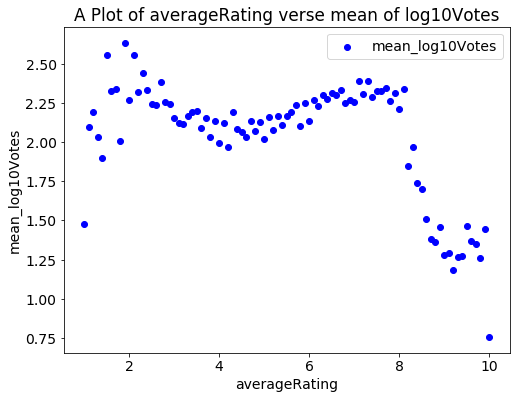

In [19]:
# using 'grouby' group all data by averageRating
df_plot = df_new2.groupby(['averageRating']).mean()
df_plot.reset_index(inplace=True)
print(df_plot.head())

# scatter plot of averageRating vs log10Votes
%matplotlib inline
mpl.rc('font', family='sans serif', size=14)
fig = plt.figure(figsize=(8,6))
plt.scatter(df_plot['averageRating'], df_plot['log10Votes'], color='blue', label='mean_log10Votes')
plt.xlabel('averageRating')
plt.ylabel('mean_log10Votes')
plt.title('A Plot of averageRating verse mean of log10Votes')
plt.legend(loc='best')
#df_plot.shape

## Regression model by sklearn

[2.48975568]
[[-0.08142263]]
0.33140852032816526
0.09228615425238407


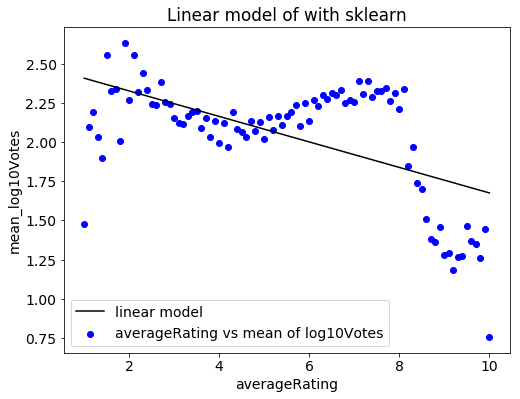

In [20]:
# import lib
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#data
x = np.array(df_plot['averageRating']).reshape(-1,1)
y = np.array(df_plot['log10Votes']).reshape(-1,1)

#model
regr = LinearRegression ()

#fitting
regr.fit(x, y)

print(regr.intercept_)
print(regr.coef_)
print(regr.score(x, y))

y_pred = regr.predict(x)

# visulizing
%matplotlib inline
mpl.rc('font', family='sans serif', size=14)
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y, color='b', label='averageRating vs mean of log10Votes' )
plt.plot(x, y_pred, color='k', label='linear model')
plt.xlabel('averageRating')
plt.ylabel('mean_log10Votes')
plt.title('Linear model of with sklearn')
plt.legend(loc='lower left')
print(metrics.mean_squared_error(y, y_pred))

## Regression model with Scipy

-0.0814226334821988 2.4897556837938897 0.3314085203281657 0.012258821618000274


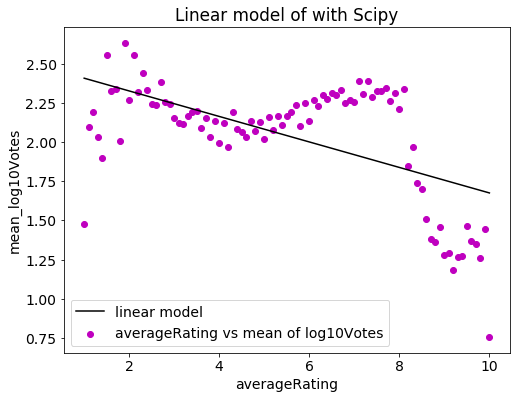

In [23]:
#import libraries
from scipy import stats

#data
x = np.array(df_plot['averageRating'])
y = np.array(df_plot['log10Votes'])

slope, intercept, rvalue, pvalue, stderr = stats.linregress (x,y)

print(slope, intercept, rvalue**2, stderr)

# model prediction
y_pred = (slope * x) + intercept

# visualizing
%matplotlib inline
mpl.rc('font', family='sans serif', size=14)
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y, color='m', label='averageRating vs mean of log10Votes' )
plt.plot(x, y_pred, color='k', label='linear model')
plt.xlabel('averageRating')
plt.ylabel('mean_log10Votes')
plt.title('Linear model of with Scipy')
plt.legend(loc='lower left')

## Regression by Pytorch

In [29]:
#data
x = np.array(df_plot['averageRating'], dtype=np.float32).reshape(-1,1)
y = np.array(df_plot['log10Votes'], dtype=np.float32).reshape(-1,1)

#import libraries
import torch
import torch.nn as nn

#create model
class LinearRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear=nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out=self.linear(x)
        return out
    
#instantiate model class, loss class and optimizer class
input_dim = 1
output_dim = 1
learning_rate = 0.01
model = LinearRegression(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#train model
epochs = 1000
for epoch in range(epochs):
    epoch += 1
    #convert numpy array to torch variable
    inputs = torch.from_numpy(x).requires_grad_()
    labels = torch.from_numpy(y)
    #clear gradients w.r.t parameters
    optimizer.zero_grad()
    #forward to get output
    outputs = model(inputs)
    #calculate Loss
    loss = criterion(outputs, labels)
    #getting gradients w.r.t parameters
    loss.backward()
    #updating parameters
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 1.7711087465286255
epoch 2, loss 0.8991093635559082
epoch 3, loss 0.8434672355651855
epoch 4, loss 0.8351337313652039
epoch 5, loss 0.8295766115188599
epoch 6, loss 0.8242172598838806
epoch 7, loss 0.8189056515693665
epoch 8, loss 0.8136333227157593
epoch 9, loss 0.8083991408348083
epoch 10, loss 0.8032030463218689
epoch 11, loss 0.798044741153717
epoch 12, loss 0.7929237484931946
epoch 13, loss 0.7878398895263672
epoch 14, loss 0.7827929258346558
epoch 15, loss 0.7777825593948364
epoch 16, loss 0.7728086113929749
epoch 17, loss 0.7678707242012024
epoch 18, loss 0.7629687190055847
epoch 19, loss 0.7581023573875427
epoch 20, loss 0.7532711029052734
epoch 21, loss 0.7484748959541321
epoch 22, loss 0.7437135577201843
epoch 23, loss 0.7389868497848511
epoch 24, loss 0.7342943549156189
epoch 25, loss 0.7296359539031982
epoch 26, loss 0.72501140832901
epoch 27, loss 0.720420241355896
epoch 28, loss 0.715862512588501
epoch 29, loss 0.7113378047943115
epoch 30, loss 0.70684593915

In [30]:
# predicted values
predicted = model(torch.from_numpy(x).requires_grad_()).data.numpy()
print (predicted, y)


[[2.3632145]
 [2.3558607]
 [2.3485072]
 [2.3411534]
 [2.3337998]
 [2.326446 ]
 [2.3190925]
 [2.3117387]
 [2.304385 ]
 [2.2970314]
 [2.2896776]
 [2.282324 ]
 [2.2749703]
 [2.2676165]
 [2.260263 ]
 [2.2529092]
 [2.2455556]
 [2.2382019]
 [2.2308483]
 [2.2234945]
 [2.2161407]
 [2.2087872]
 [2.2014334]
 [2.1940799]
 [2.186726 ]
 [2.1793723]
 [2.1720188]
 [2.164665 ]
 [2.1573114]
 [2.1499577]
 [2.1426039]
 [2.1352503]
 [2.1278965]
 [2.120543 ]
 [2.1131892]
 [2.1058354]
 [2.098482 ]
 [2.091128 ]
 [2.0837746]
 [2.0764208]
 [2.069067 ]
 [2.0617135]
 [2.0543597]
 [2.0470061]
 [2.0396523]
 [2.0322986]
 [2.024945 ]
 [2.0175912]
 [2.0102377]
 [2.002884 ]
 [1.9955302]
 [1.9881766]
 [1.9808229]
 [1.9734693]
 [1.9661155]
 [1.9587618]
 [1.9514081]
 [1.9440545]
 [1.9367008]
 [1.929347 ]
 [1.9219935]
 [1.9146397]
 [1.907286 ]
 [1.8999324]
 [1.8925786]
 [1.885225 ]
 [1.8778713]
 [1.8705176]
 [1.863164 ]
 [1.8558102]
 [1.8484566]
 [1.8411028]
 [1.8337493]
 [1.8263955]
 [1.8190418]
 [1.8116882]
 [1.8043344]

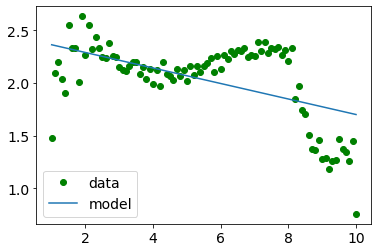

In [31]:
#plot predicted and actual values
plt.plot(x, y, 'go', label = 'data')
plt.plot(x, predicted, label ='model')
plt.legend(loc='best')
plt.show()